In [10]:
# !python yolov5a/detect.py --weights yolov5a/cobest.pt --source data/image/4.jpg

In [11]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

YOLOv5  2022-12-25 Python-3.10.8 torch-1.13.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


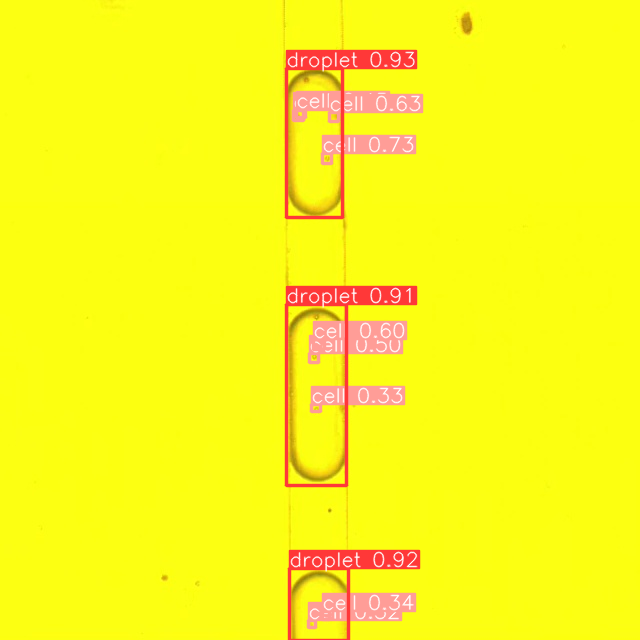

In [12]:

model = torch.hub.load('yolov5', 'custom', path='yolov5/runs/train/exp9/weights/best.pt', source='local') 
# Image
img = 'data/image/10000.jpg'
# Inference
results = model(img)
# Results, change the flowing to: results.show()
results.show()  # or .show(), .save(), .crop(), .pandas(), etc

In [13]:
results.xyxy

[tensor([[2.86302e+02, 6.81907e+01, 3.42056e+02, 2.17241e+02, 9.34205e-01, 0.00000e+00],
         [2.89848e+02, 5.68409e+02, 3.48606e+02, 6.40000e+02, 9.21472e-01, 0.00000e+00],
         [2.86023e+02, 3.04864e+02, 3.46788e+02, 4.85399e+02, 9.09179e-01, 0.00000e+00],
         [3.22848e+02, 1.53636e+02, 3.31173e+02, 1.63188e+02, 7.26678e-01, 1.00000e+00],
         [3.29438e+02, 1.12991e+02, 3.38544e+02, 1.21225e+02, 6.27802e-01, 1.00000e+00],
         [3.13299e+02, 3.39381e+02, 3.24612e+02, 3.49212e+02, 6.02389e-01, 1.00000e+00],
         [3.09799e+02, 3.53357e+02, 3.18204e+02, 3.62352e+02, 5.02695e-01, 1.00000e+00],
         [2.96964e+02, 1.09244e+02, 3.05889e+02, 1.17198e+02, 4.45854e-01, 1.00000e+00],
         [2.93693e+02, 1.10726e+02, 3.03007e+02, 1.20339e+02, 4.44393e-01, 1.00000e+00],
         [3.22713e+02, 6.11360e+02, 3.29966e+02, 6.19620e+02, 3.43951e-01, 1.00000e+00],
         [3.11519e+02, 4.04961e+02, 3.20857e+02, 4.11776e+02, 3.32495e-01, 1.00000e+00],
         [3.08058e+02

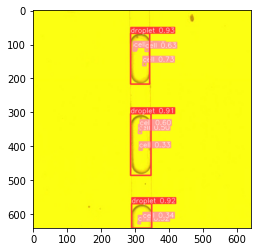

In [16]:
%matplotlib inline 
img = np.squeeze(results.render())
img_old = img.copy()
# img_raw = img.copy()
cv2.imwrite('result/result_yolo.jpg', cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
plt.imshow(np.squeeze(results.render()))
plt.show()